In [3]:
from base import np
from oneD import Solver1D

# Export figures to Folder
figures_path = "../TFG_latex/Figures/Nutrients1D/"

## Absorption-Diffusion Timescales
Comparing the diffusion and absorption timescales for the non-dimensionalised **Steady State Diffusion-Absorption Equation**:
$$
\frac{\partial^2 n}{\partial x^2} - \alpha n(x) c(x) = 0
$$
$x \in [0,L]$

### Timescales

#### Absorption timescale

$$
\tau_c(x) := \frac{1}{\alpha c(x)}
$$
We need a general, single-value timescale for the whole domain $[0,L] \equiv [0,1]$.
$$
\langle \tau_c \rangle
    = \frac{1}{\alpha} \left\langle \frac{1}{c(x)} \right\rangle
        \overset{\star}{\to} \infty
    \overset{\star \star}{\geq}
\tau_{\langle c \rangle}
    = \frac{1}{\alpha \langle c \rangle}
    \overset{\star\star\star}{=} \frac{L}{\alpha}
    \equiv \frac{1}{\alpha}
$$
- $(\star)$ $\exists x$ such that $c(x) = 0$. Therefore, $\langle \tau_c \rangle$ diverges and is not a valid metric.

- $(\star\star)$ By the AM-HM inequality. The equality holds true when $c(x)$ is constant.

- The continuous average is defined as $\langle c \rangle = \frac{\int_0^L c(x) dx}{\int_0^L \, dx} = \frac{1}{L} \int_0^L c(x) \, dx$.

- $(\star\star\star)$ $\mathcal{N} = \int_0^L c(x) dx \equiv \langle c \rangle \, L = 1$ $\Rightarrow \langle c \rangle = \frac{1}{L}$.

#### Diffusion timescale

$$
\tau_d := \frac{L^2}{2D} = 1
$$

Since the non-dimensional equation means $D = 1$

#### Comparison

$$
\frac{\tau_{\langle c \rangle}}{\tau_d}
    = \frac{2\cancel{D}}{\alpha \, L}
    \begin{cases} 
        \ll 1,  &  \text{Absorption domination}  \\
        \sim 1, &  \text{Comparable timescales} \\
        \gg 1,  &  \text{Diffusion domination}
    \end{cases}
$$

In [ ]:
syst_params = {
'L' : 1,  'T' : 1,      # Lenght & Time Domain
'T_ratio': None,        # Timescales Ratio (Tc/Td)
'nx': 1_000,   'nt': 100   # Num Spatial/Temporal Points
}
L = syst_params['L']

def n0_linear(x):
    return x / L
def c_const(x):
    return np.ones_like(x)

### Absorption Domination ($\tau_{\langle c \rangle} / \tau_d \ll 1$) 📄

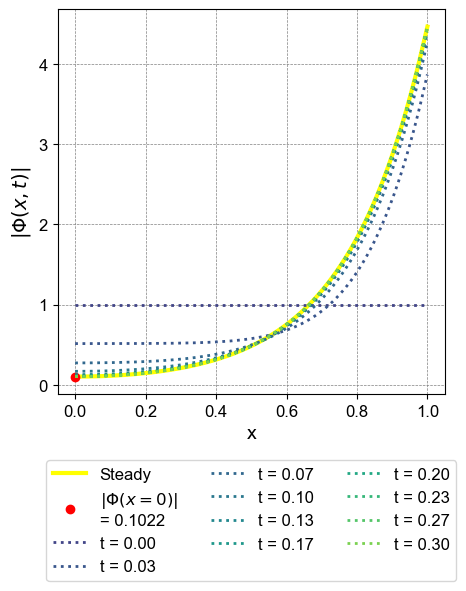

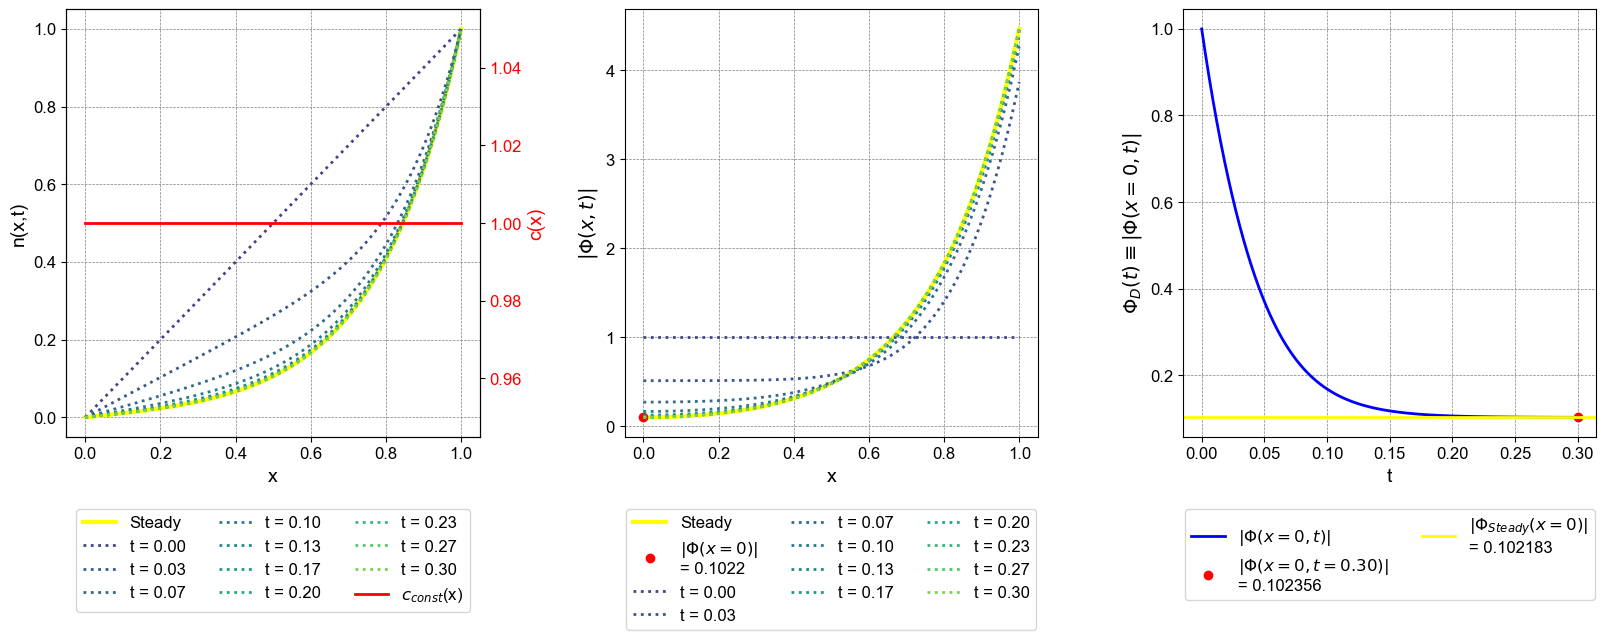

In [5]:
syst_params['T_ratio'] = 0.1
syst_params['T']  = 0.30

S1D = Solver1D(syst_params, c_const, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.nutrient_flux(legend_loc='outside')
S1D.plot.save(figures_path, "Abs_Dom")
S1D.plot.triple_plot(legend_loc='outside')

### Comparable Timescales ($\tau_{\langle c \rangle} / \tau_d \sim 1$) 📄

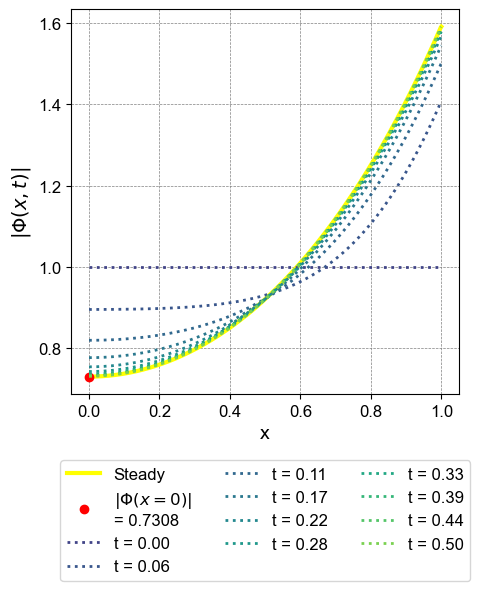

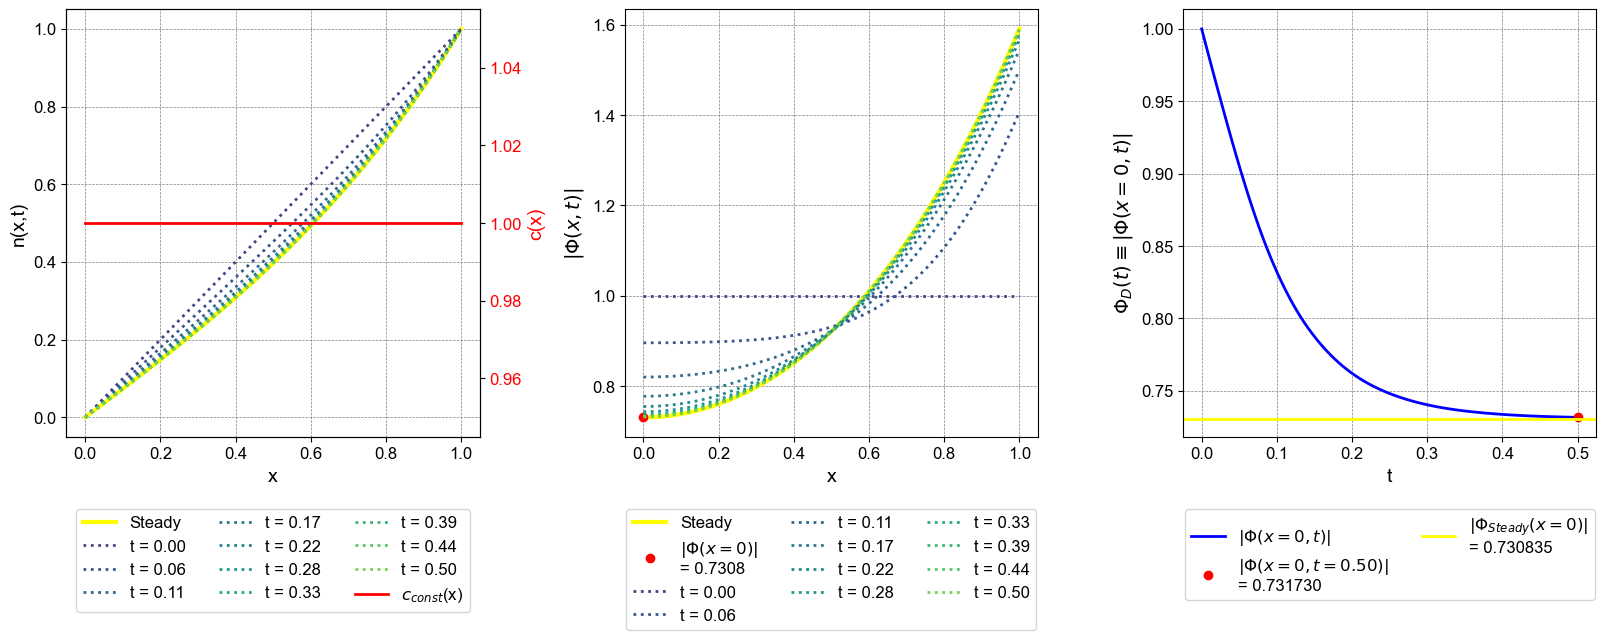

In [6]:
syst_params['T_ratio'] = 1
syst_params['T']  = 0.5

S1D = Solver1D(syst_params, c_const, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.nutrient_flux(legend_loc='outside')
S1D.plot.save(figures_path, "Diff~Abs")
S1D.plot.triple_plot(legend_loc='outside')

### Diffusion Domination ($\tau_{\langle c \rangle} / \tau_d \gg 1$) 📄

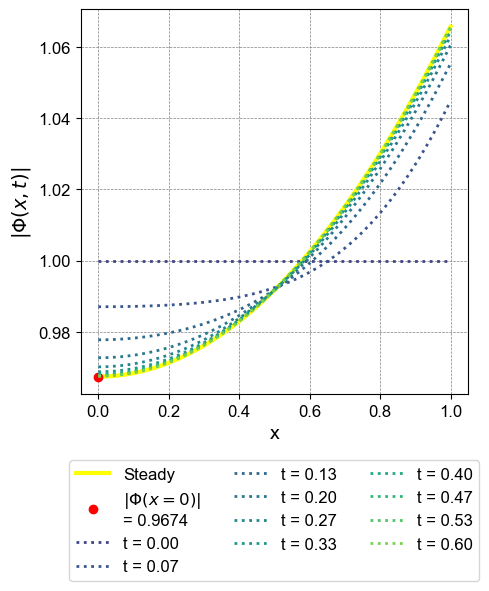

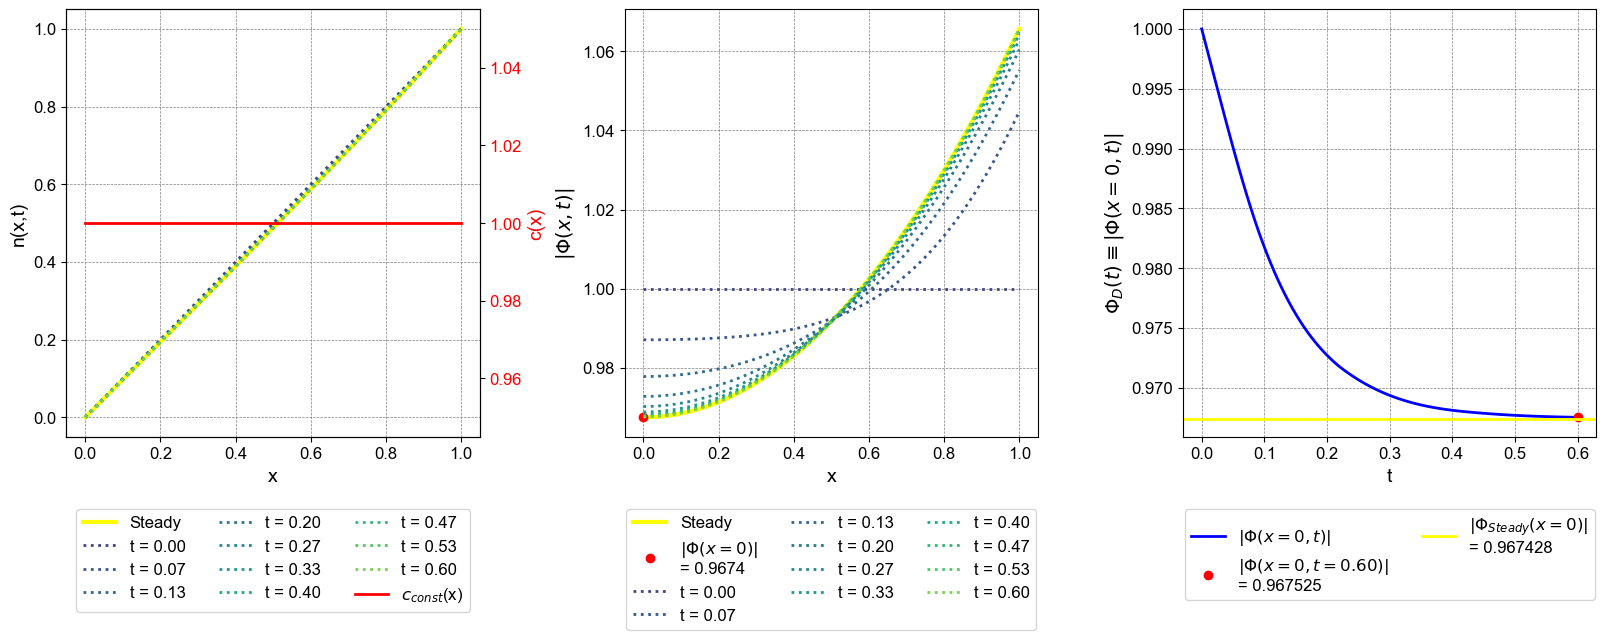

In [7]:
syst_params['T_ratio'] = 10
syst_params['T']  = 0.6

S1D = Solver1D(syst_params, c_const, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.nutrient_flux(legend_loc='outside')
S1D.plot.save(figures_path, "Diff_Dom")
S1D.plot.triple_plot(legend_loc='outside')

___
### Why Do Spurious Oscillations Appear?

Posible reasons?
- **Insufficient grid resolution**
  - Increasing grid resolution ❌
- **Non-smooth initial condition or boundary condition**
  - Using smoothed out $c(x)$ and $n (x,t=0)$ ❌
- **Choice of numerical scheme / Stability issues**
  - Try rescaling factors, avoid floating-point numbers (as: $\alpha = 1/10$)❓
- **Improving the numerical scheme for Stiff PDEs**
  - Change to the `Radau` method ✅ 